<a href="https://colab.research.google.com/github/ferreiramar96/Deteccao-Fraude-Cartao-Credito/blob/main/Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, iremos abordar o problema das fraudes em cartões de crédito, uma das principais preocupações das instituições financeiras como bancos e *fintechs*. Apenas no Brasil, cerca de 12,1 milhões de pessoas já foram vítimas de algum tipo de fraude financeira no último ano. Traduzindo em valores, os golpes financeiros ultrapassaram a cifra de R$ 1,8 bilhão de prejuízo por ano para os últimos 12 meses.

Com o avanço tecnológico e o aumento do comércio eletrônico, os cartões de crédito se tornaram uma forma comum de pagamento em todo o mundo. No entanto, esse cenário também abriu portas para fraudadores que buscam explorar as vulnerabilidades do sistema. A detecção eficiente de fraudes em tempo real tornou-se uma necessidade absoluta para proteger os consumidores e as instituições financeiras.


<p align=center>
<img src="https://github.com/ferreiramar96/Deteccao-Fraude-Cartao-Credito/blob/main/fraud.png?raw=true" width="88%"></p>

Dentra essas fraudes, aquelas envolvendo cartões de crédito são de grande relevância uma vez que a sua não-detecção acaretará em prejuízos consideráveis, tanto para o consumidor quanto para a instituição financeira.

Um outro fator a ser considerado é a quantidade de falsos positivos, ou seja, aquelas vezes em que você tentou fazer uma compra e teve seu cartão bloqueado preventivamente - o que provavelmente gerou estresse e constrangimento.

Por todos esses motivos, o investimento na área de detecção de fraudes por meio de Inteligência Artificial vem crescendo a cada ano, representando uma grande oportunidade em *Data Science*.

Dispondo de grandes volumes de dados como base histórica, um algoritmo de machine learning apenas um pouco melhor que os anteriores já representa uma economia de milhões de Reais. E esse é o desafio, aprimorar cada vez mais o uso de algoritmos visando inibir ou evitar transações fraudulentas.

## Objetivo do Projeto
O objetivo principal do projeto é desenvolver modelos preditivos precisos e confiáveis que possam distinguir entre transações legítimas e fraudulentas. Para isso, exploraremos algoritmos de Machine Learning, como Regressão Logística e Árvores de Decisão, que nos ajudarão a aprender padrões ocultos e a tomar decisões informadas com base nos dados disponíveis.

Mas é claro que para antes de chegarmos na parte de construir um modelo, teremos de fazer algumas análises, tais como: Verificar se existem dados faltantes, ver correlações de variáveis, fazer uma descrição estatística, plotar alguns histogramas, ver o balanceamento de classes, padronizar. Fazer todo um Pré-Processamento, e a partir daí será possível começar a construir e comparar modelos de Machine Learning, para ver qual se adapta melhor ao problema.

<p align="center">
<img src="https://raw.githubusercontent.com/ferreiramar96/Deteccao-Fraude-Cartao-Credito/main/Data_security_11.jpg" width="50%">
</p>

Levando em consideração todos esses pontos acima, podemos então começar nosso projeto, sendo o primeiro ponto a importação dos nossos dados, mas antes de importa-los irei dar uma breve explicaçao sobre eles e aprensentar de onde foram tirados.

## Importando os Dados

Os dados que usaremos neste projeto foram disponibilizados por algumas empresas européias de cartão de crédito. O *dataset* representa as operações financeiras que aconteceram no período de dois dias, onde foram classificadas 492 fraudes em meio a quase 290 mil transações.

Como você pode notar, este é um conjunto de dados extremamente desbalanceado, onde as fraudes representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://images.unsplash.com/photo-1620714223084-8fcacc6dfd8d?ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&ixlib=rb-1.2.1&auto=format&fit=crop&w=1051&q=80" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é informado que as variáveis passaram por uma transformação conhecida como Análise de Componentes Principais (*Principal Component Analysis* - PCA).

A PCA permite a redução da dimensionalidade enquanto mantém o maior número possível de informações. Para conseguir isso, o algoritmo encontra um conjunto novo de recursos - os chamados **componentes**.

Esses componentes são em número menor or igual às variáveis originais. No caso deste projeto, os componentes achados pela transformação da PCA são as próprias colunas $[V1, V2, V3 \dots, V28]$.

In [ ]:
# importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from imblearn.under_sampling import RandomUnderSampler

%matplotlib inline

A partir de agora, iremos ter nosso primeiro contado com os dados

In [ ]:
dados = "https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1"

#importar os dados para um dataframe
df = pd.read_csv(dados)

#Dimensão do conjunto original
print(f"Dimensão do Conujunto Original: {df.shape}")

#Criando um conjunto de teste
test = df.sample(frac=0.15, random_state=0)

#Apagando as linhas onde os dados de test foram pegos
df = df.drop(test.index)

#Verificando o conjunto de dados após a separação
print(f"Dimensão do Conujunto de Teste: {test.shape}")
print(f"Dimensão do Conujunto de Treino: {df.shape}")

Dimensão do Conujunto Original: (284807, 31)
Dimensão do Conujunto de Teste: (42721, 31)
Dimensão do Conujunto de Treino: (242086, 31)


Com os dados importados para dentro de uma estrutura *Dataframe* - e não havendo a necessidade de mais nenhum ajuste ou configuração nesta etapa, podemos iniciar nossa análise exploratória dos dados a fim de preparar um modelo de *Machine Learning*.

Lembrando que, acima fiz uma divisão dos dados que consiste em: 15% dos dados do nosso DataFrame original, foi separado para dados de teste. Que no final, após termos criado e ajustado nosso modelo de Machine Learning, possamos utilizar os dados de teste para avaliar o quão bom nosso modelo é, sem aplicarmos nenhuma modificação nos dados de teste, já que é assim que os dados chegam no dia a dia.

## Dicionário de Variáveis

* `Time` - Segundos entre cada transação
* `Amount` - Valor da transação
* `Class` - Variável que prova se é fraude ou não
* `V1-V28` - Variáveis ocultas por privacidade




## Análise Exploratória

Observando apenas as cinco primeiras entradas, já conseguimos tirar algumas conclusões, como:
* Entender como a tranformação PCA deixa os valores reais das colunas de uma forma anônima e em valores numéricos
* As colunas `Time` e `Amount` foram preservadas, mantendo seu valor original.
* A variável `Class` é a que nos interessa para fazer as previsões, onde:
  * **0:** Transação Normal;
  * **1:** Transação Fraudulenta;


In [ ]:
#Visualizando 5 primeiras entradas
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Logo em seguida irei exibir um resumo estatístico do nosso DataFrame, com algumas informações como: Média, Mediana, Desvio Padrão, Quartis e Valores Máximo e Mínimo.

In [ ]:
#Descrição estatística dos dados
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Observando as informações acima, podemos tirar algumas conclusões: As variáveis `V1-V28` e `Time` não possuem nenhuma discrepância.

Já na variável `Amount`, podemos pegar alguns insights:
* A média das transações é 88.61
* A mediana é 22
* O desvio padrão é 247.65
* 75% dos valores estão abaixo de 77.58
* O valor máximo de uma transição é 19656.53




A seguir irei verificar se existem valores nulos em nosso dataset, caso haja...teremos que tomar alguma providência, o ideal seria preencher com zeros ou com a mediana, ou talvez apagar as linhas que estão nulas, tudo depende do problema.

Isso tudo por que para treinarmos um modelo de Machine Learning, não podem existir valores nulos.

In [ ]:
#Verificando valores ausentes
df.isnull().sum().max()

0

Felizmente, em nosso conjunto de dados não existem valores ausentes, então não será preciso realizar nenhum procedimento especial.

Agora vamos verificar como está as distribuições de classes, ver se estão muito desbalanceadas e se será nescessário fazer alguma transformação. Para isso, irei fazer um plot do tipo contagem para os 0s e 1s, e também ver a porcentagem de valores considerados fraudulentos.

0    241668
1       418
Name: Class, dtype: int64
Normais representam: 99.8273% do dataset
Fraudes representam: 0.1727% do dataset


[]

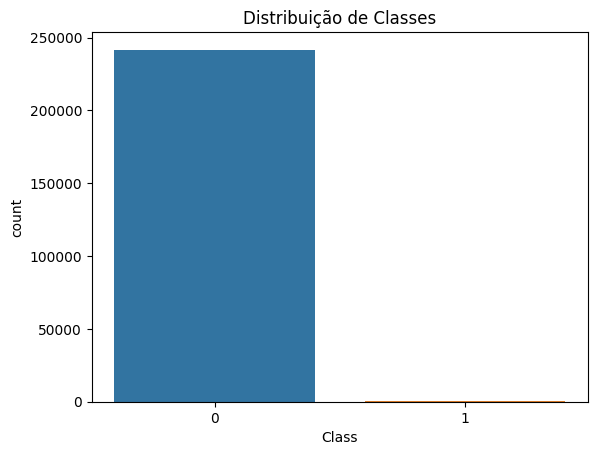

In [ ]:
#Verificando o balanceamento do dataset
print(df["Class"].value_counts())
perc_val_frau = (df[df["Class"]==1].shape[0]/df.shape[0])*100
perc_no_frau = (df[df["Class"]==0].shape[0]/df.shape[0])*100
print(f"Normais representam: {perc_no_frau:.4f}% do dataset")
print(f"Fraudes representam: {perc_val_frau:.4f}% do dataset")

#Construindo um gráfico de barras para as classes
fig, ax = plt.subplots()
sns.countplot(x=df["Class"], ax=ax)
ax.set_title("Distribuição de Classes")
plt.plot()

Com as análises feitas acima, chegamos à algumas conclusões:
* Existem 241.668 valores 0(normal) e apenas 418 valores 1(fraude)
* As fraudes representam apenas 0.17% dos dados
* As transações normais representam aproximadamente 99.83% dos dados

Com esses pontos destacados acima, podemos ver claramente que existe um enorme desbalanceamento entre as classes. Logo iremos fazer um rebalanceamento, mas ainda não vamos nos preocupar com isso. Continuemos as análises...

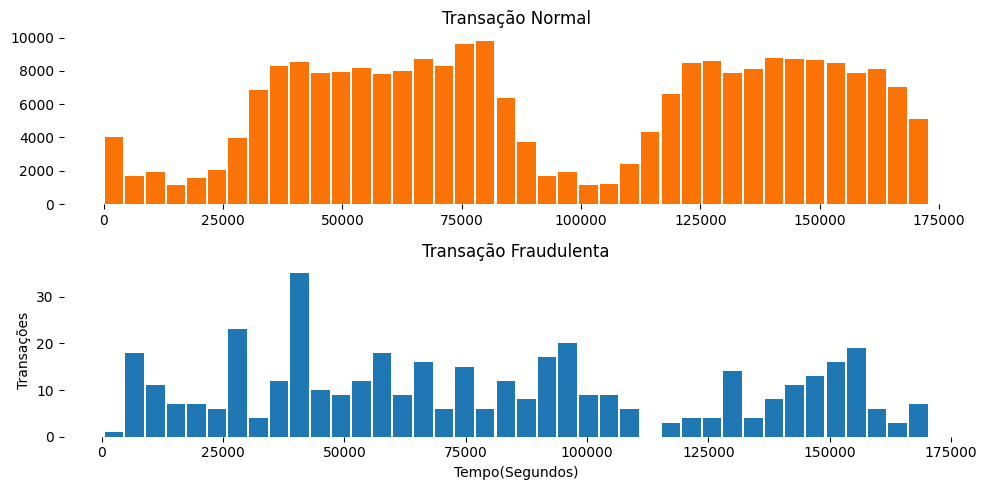

In [ ]:
#Plotando um histograma da variável Time por Classes
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 5))


ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].spines['bottom'].set_visible(False)
ax[0].spines['left'].set_visible(False)

ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].spines['bottom'].set_visible(False)
ax[1].spines['left'].set_visible(False)

ax[0].hist(df['Time'][df['Class']==0], bins=40, rwidth=0.9, color='#F97306')
ax[0].set_title("Transação Normal", )

ax[1].hist(df['Time'][df['Class']==1], bins=40, rwidth=0.9)
ax[1].set_title("Transação Fraudulenta")

plt.xlabel("Tempo(Segundos)")
plt.ylabel("Transações")
plt.tight_layout()

Na célula acima criei 2 histogramas, uma para as transações normais e outra para transações fraudulentas, ambas ao longo do tempo para ver se era possível identificar algum padrão ou informação a partir deles. Porém, nada foi identificado a partir das distribuções acima.

Abaixo irei criar alguns boxplots para verificar se existem valores discrepantes(outliers) na variável `Amount` e depois verificar outliers para cada classe de forma separada.

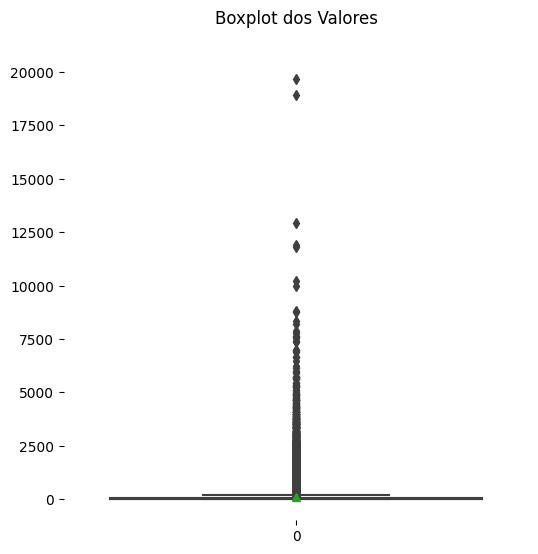

In [ ]:
#Plotar boxplot para Amount
fig, ax = plt.subplots(figsize=(6,6))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

sns.boxplot(data=df['Amount'], ax=ax, showmeans=True)
ax.set_title("Boxplot dos Valores", pad=25)
plt.show()

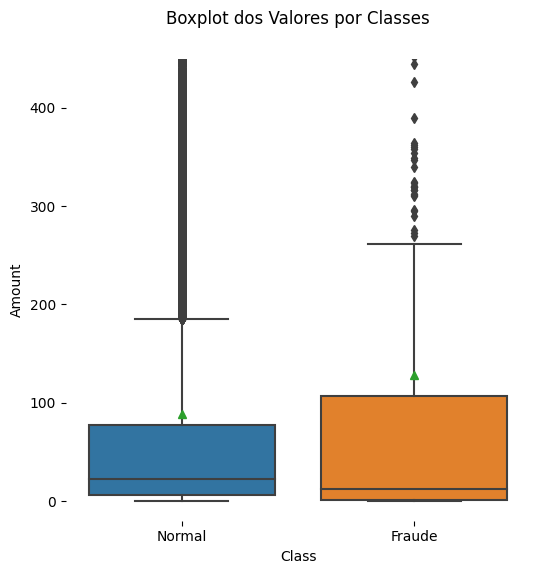

In [ ]:
#Plotar boxplot de Amount para cada uma das classes
fig, ax = plt.subplots(figsize=(6,6))

sns.boxplot(x=df["Class"], y=df["Amount"], showmeans=True, ax=ax)
plt.ylim((-20, 450))
plt.xticks([0, 1], ["Normal", "Fraude"])
ax.set_title("Boxplot dos Valores por Classes", pad=25)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.show()

Ao analisarmos os boxplots, conseguimos visualizar claramente que existem outliers na variável `Amount`, tanto para as classes normais quanto para as fraudulentas. E também é possível observar a média dos dados onde existe uma setinha verde.

Para podermos finalizar nossa análise exploratória de dados, a seguir irei criar um histograma de `Amount` para a classe fraudulenta(1) e junto também vou fazer uma descrição estatística de Amount para as classes de forma indivídual para ver se pode existir alguma correlação dos valores outliers com a classe pertencente.

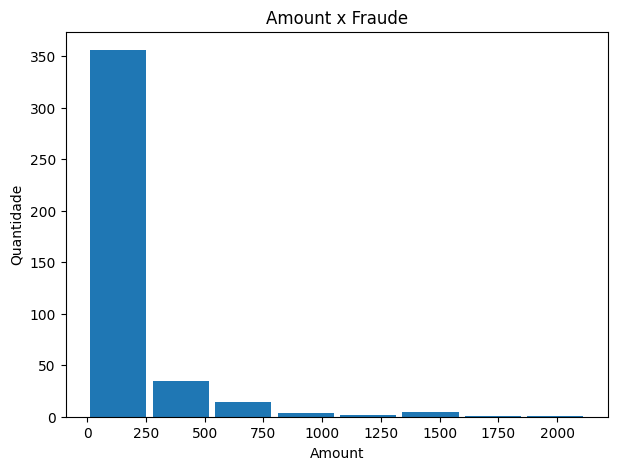

In [ ]:
#Plotar Histograma de Amount para Class = 1
fig, ax = plt.subplots(figsize=(7,5))

amount_fraud = df['Amount'][df['Class'] == 1]

ax.hist(amount_fraud, bins=8, rwidth=0.9)
ax.set_xlabel("Amount")
ax.set_ylabel("Quantidade")
ax.set_title("Amount x Fraude")
plt.locator_params(axis='x', nbins=10)
plt.show()

In [ ]:
#Verificando descrição estatística das classes de forma separada
norm_0 = df['Amount'][df['Class'] == 0]
fraud_1 = df['Amount'][df['Class'] == 1]

print("Valores Normais:")
print(norm_0.describe())
print("-----------------------------")
print("Valores Fraudulentos:")
print(fraud_1.describe())

Valores Normais:
count    241668.000000
mean         88.543443
std         247.613919
min           0.000000
25%           5.700000
50%          22.000000
75%          77.500000
max       19656.530000
Name: Amount, dtype: float64
-----------------------------
Valores Fraudulentos:
count     418.000000
mean      128.496722
std       267.731154
min         0.000000
25%         1.000000
50%        11.855000
75%       106.812500
max      2125.870000
Name: Amount, dtype: float64


Ótimo! Com essas últimas 2 análises podemos observar:
* A maioria das compras Fraudulentas está entre 0 e 250
* A média de valores normais e fraudulentas são bem diferentes
* Média Normais: 88.54 / Média Fraudes: 128.49, uma diferença de 45%

A parir desses pontos, pode ser que nosso nosso modelo de Machine Learning considere um valor um pouco mais alto como se fosse Fraude, e isso pode ser um problema. Iremos agora começar a preparar nossos dados para podermos aplicar um modelo.

## Preparação dos Dados

Como disse anteriormente, já fizemos algumas análises para podermos nos aprofundar e entender os dados. Porém antes de aplicarmos um modelo de Machine Learning precisamos fazer algumas preparações, para que o modelo seja o melhor possível, e para isso os dados precisam ser bons o suficiente.

Iremos realizar algumas coisas, como:

* Padronizar os dados de: `Time` e `Amount`
* Dividir o conjunto de dados entre treino e validação
* Balancear o conjunto de dados

## Padronização dos dados

A padronização dos dados, também conhecida como normalização, é um processo comum na pré-processamento de dados usado para transformar os valores das variáveis em uma escala comum. O objetivo é garantir que todas as variáveis tenham a mesma ordem de grandeza, eliminando assim as diferenças de escala entre elas.

A padronização é realizada calculando a média e o desvio padrão dos dados e, em seguida, subtraindo a média de cada valor e dividindo pelo desvio padrão. Isso resulta em uma distribuição com média zero e desvio padrão igual a um.

Padronizarei as colunas: **Amount** e **Time**. Como sabemos que a variável Amount contém valores outliers, irei utilizar a função **StandardScaler** da biblioteca Scikit-Learn.



In [ ]:
#Criando uma cópia do DataFrame original
df_std = df.copy()

#Instanciando a função
std_scaler = StandardScaler()

#Aplicando a transformação
df_std["std_amount"] = std_scaler.fit_transform(df_std["Amount"].values.reshape(-1, 1))
df_std["std_time"] = std_scaler.fit_transform(df_std["Time"].values.reshape(-1, 1))

#Apagando colunas sem a transformação
df_std.drop(columns=["Time", "Amount"], axis=1, inplace=True)

#Visualizando os novos dados
df_std.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


Agora após a transformação conseguimos perceber que os dados de `std_amount` e `std_time` estão parecidos com nossas variáveis `V1-V28`, isso significa que estão todas em uma mesma escala.

## Separando os Dados em Treino e Teste

Com os dados padronizados, agora podemos dividir nosso conjunto de dados entre **Treino** e **Validação**, onde 75% dos nossos dados será direcionado para treino e 25% para validação. Vou fazer essa divisão antes de balancear os dados pois, irei utilizar apenas os dados de treino para fazer esse balanceamento, e por fim aplicar esses dados para treinar nosso modelo, afim de que quando formos valida-lo podemos ver quão bom é nosso modelo.

Para isso irei utilizar a função **train_test_split**, e irei utilizar dois parâmetros afim de conseguir uma melhor separação nos dados, são elas: Stratify e Shuffle.

* **Stratify**: É usado para realizar uma divisão estratificada dos dados. Isso significa que, ao dividir os dados em subconjuntos de treinamento e teste, a distribuição das classes ou rótulos é mantida em ambos os conjuntos.

* **Shuffle**: É usado para embaralhar os dados antes de fazer a divisão, evitando qualquer viés ou ordem nos dados.

In [ ]:
#Separando os dados
x = df_std.drop("Class", axis=1)
y = df_std["Class"]

#Dividindo os dados entre Treino e Teste
x_train, x_val, y_train, y_val = train_test_split(x, y, stratify=y, shuffle=True)

#Mostrando a proporção dos nossos dados
print(f"Dados Totais: {df_std.shape[0]}")
print(f"Dados de Treino: {x_train.shape[0]}")
print(f"Dados de Validação: {x_val.shape[0]}")

Dados Totais: 242086
Dados de Treino: 181564
Dados de Validação: 60522


Como podemos observar nossos dados totais são 242.086, já os dados de treino são 181.564 o que corresponde a 75% dos dados, e os dados de validação são 60.522 que represesnta 25% do total de dados. Com os dados já separados, podemos partir para a próxima etapa que é o balanceamento do conjunto de classes.

## Balanceamento dos Dados

O balanceamento é um procedimento utilizado para lidar com conjuntos de dados desequilibrados, nos quais uma ou mais classes têm um número significativamente menor de exemplos em comparação com outras classes. Esse desequilíbrio pode causar problemas durante o treinamento de um modelo. O objetivo do balanceamento de classes é corrigir esse desequilíbrio.

Existem várias técnicas comumente usadas para balancear as classes:

* **Oversampling**: É uma técnica de balanceamento de classes em que a classe minoritária é aumentada através da replicação ou geração de exemplos adicionais. Isso é feito para equalizar o número de exemplos entre as classes, tornando o conjunto de dados mais equilibrado.

* **Undersampling**: É uma técnica de balanceamento de classes em que a classe majoritária é reduzida, removendo exemplos aleatoriamente ou com base em algum específico necessário. Isso é feito para igualar o número de exemplos entre as classes e evitar o viés em direção à classe majoritária.

Neste projeto irei utilizar o método de balanceamento Undersampling da biblioteca `imblearn`. Pois como vimos mais acima, nossos dados estão completamente desbalanceados.

0    313
1    313
Name: Class, dtype: int64


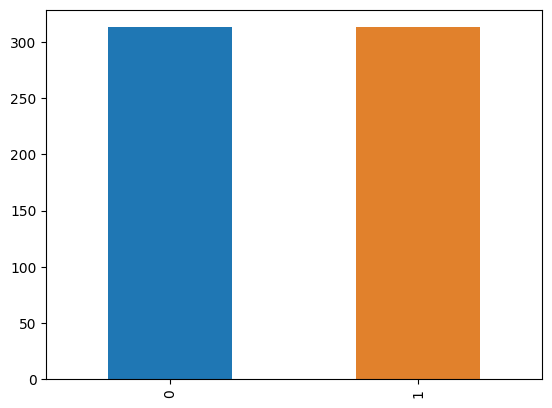

In [ ]:
#Instanciando a função do imblearn
under_sampler = RandomUnderSampler()

#Aplicando a transformação
x_bal, y_bal = under_sampler.fit_resample(x_train, y_train)

#Construindo um gráfico de barras para as classes após o balanceamento
print(y_bal.value_counts())

color_mapping = {
    0: '#1f77b4',
    1: '#e1812c'}

ax = y_bal.value_counts().plot(kind='bar', color=[color_mapping.get(x, 'cor padrão') for x in y_bal.unique()])

Observando o gráfico acima podemos ver como o balanceamento funciona, e como nossas classes estão bem distribuidas agora. Com esse balanceamento, fazemos com que nosso modelo evite dar Overfiting, que é quando o modelo é tão preciso que se torna ruim, pois ele não será bom para dados novos, já que ele decorou os dados anteriores em vez de aprender.

Logo em seguida irei plotar uma matriz de correlação entre as variáveis, uma matriz para os dados debalanceados e uma para os dados balanceados, e veremos se mudou alguma coisa. E logo em seguida, finalmente chegaremos na parte de construir nosso modelo de Machine Learning.

Text(0.5, 1.0, 'Dados Balanceados')

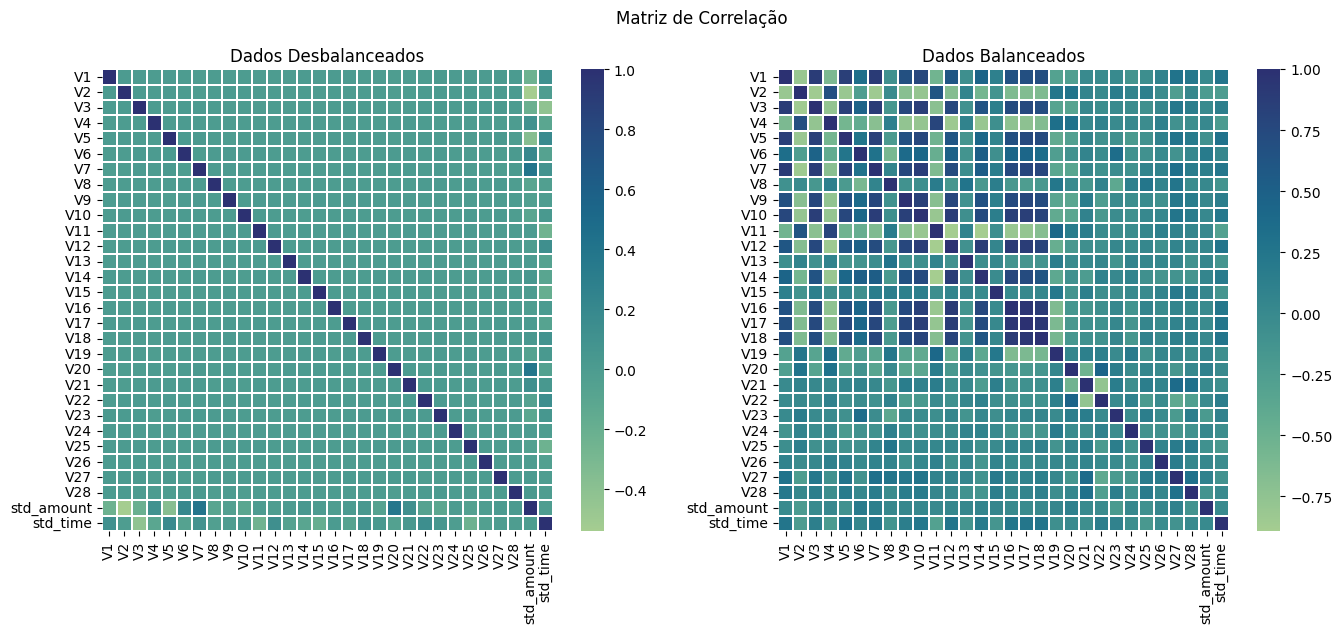

In [ ]:
#Fazendo a correlação
corr_balanceados = x_bal.corr()
corr_desbalanceados = x_train.corr()

#Matriz de correlação dos dados balancedos e desbalanceados
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
fig.suptitle("Matriz de Correlação")

sns.heatmap(corr_desbalanceados, ax=ax[0], linewidth=.01, cmap="crest")
ax[0].set_title("Dados Desbalanceados")
sns.heatmap(corr_balanceados, ax=ax[1], linewidth=.01, cmap="crest")
ax[1].set_title("Dados Balanceados")

Como podemos observar, após o balanceamento dos dados as variáveis possuiem uma correlação maior do que quando eram desbalanceadas. Para entenderem melhor, vou explicar como funciona uma correlação, ela sempre varia de -1 a 1 que significa:

* Um valor próximo de 1 indica uma correlação positiva forte, ou seja, as variáveis tendem a variar na mesma direção.

* Um valor próximo de -1 indica uma correlação negativa forte, ou seja, uma variável tende a aumentar enquanto a outra tende a diminuir.

* Um valor próximo de 0 indica uma correlação fraca ou nula, ou seja, as variáveis não apresentam uma relação linear aparente.

Daremos inicio agora a nossa parte de modelos de Machine Learning.

## Modelo de Machine Learning

Machine Learning é uma área da inteligência artificial em que os computadores podem aprender a partir de dados, identificando padrões e tomando decisões sem serem explicitamente programados. É uma forma de treinar modelos para realizar tarefas e fazer previsões com base em exemplos fornecidos.

Em nosso projeto de Detecção de Fraude em Cartão de Crédito, iremos utilizar técnicas de Machine Learning para identificar padrões que indiquem transações fraudulentas e prevenir possíveis fraudes. Nós iremos utilizar um modelo de classificação, no caso vou testar dois algoritmos: Regressão Logística e Árvore de Decisão, e ver qual se sai melhor.

## Modelo - Regressão Logística

A Regressão Logística é um algoritmo de aprendizado de máquina que é usado principalmente para resolver problemas de classificação. É uma técnica estatística que permite prever a probabilidade de uma determinada variável pertencer a uma classe específica com base em um conjunto de variáveis independentes. A regressão logística é especialmente útil quando lidamos com problemas binários, ou seja, quando temos que prever se um evento ocorrerá ou não. É amplamente utilizado em diversas áreas, como medicina, finanças, marketing e análise de dados, para tomar decisões e fazer previsões com base em dados disponíveis.

<p align="center">
<img src="https://raw.githubusercontent.com/ferreiramar96/Deteccao-Fraude-Cartao-Credito/main/logistic_regression.png" width=60%>
</p>

O modelo de regressão logística aprende com os dados de treinamento e encontra a melhor maneira de combinar essas variáveis para prever se uma transação é fraudulenta ou não. Ele faz isso atribuindo pesos às variáveis e calculando uma pontuação para cada transação.

Essa pontuação é então passada por uma função chamada função sigmoid, que transforma a pontuação em uma probabilidade. A função sigmoid retorna um valor entre 0 e 1, representando a probabilidade de uma transação ser fraudulenta, sendo que o seu limite de decisão padrão é 0.5, mas é possível alterar. Por exemplo, um valor próximo de 0,8 significa que há uma alta probabilidade de ser uma transação fraudulenta, pois como está acima de 0,5 ele classifica como 1.

Para podermos avaliar o quão bom é nosso modelo, temos algumas métricas:
* Acurácia
* Matriz de Confusão
* Precisão
* Recall
* F1-Score
* AUC

Para um projeto de detecção de fraude em cartões, a métrica mais importante para nós é o Recall ou Taxa de Verdadeiros Positivos. Isso porque nosso principal objetivo é identificar corretamente o maior número possível de transações fraudulentas, minimizando os casos em que uma fraude é classificada como normal(Falso Negativo).

## Previsão com os Dados de Validação

In [ ]:
#Instanciando o modelo
np.random.seed(2)
reg_log = LogisticRegression()

#Treinando o modelo
reg_log.fit(x_bal, y_bal)

#Fazendo previsão com os dados de validação
y_predict = reg_log.predict(x_val)
y_probability = reg_log.predict_proba(x_val)

Com o nosso modelo já treinado e já feito a previsão, podemos criar um relatório com as métricas de avaliação + a sua matriz de confusão.

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.952     0.975     60417
           1      0.032     0.933     0.063       105

    accuracy                          0.952     60522
   macro avg      0.516     0.942     0.519     60522
weighted avg      0.998     0.952     0.974     60522

Acurácia: 0.952

AUC: 0.942


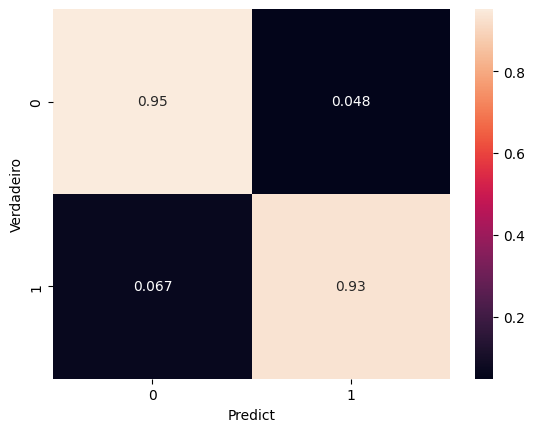

In [ ]:
#Criando o relatório
print(f"Relatório de Classificação:\n {classification_report(y_val, y_predict, digits=3)}")
print(f"Acurácia: {accuracy_score(y_val, y_predict):.3f}\n")
print(f"AUC: {roc_auc_score(y_val, y_predict):.3f}")

#Criando a matriz de confusão
matriz = confusion_matrix(y_val, y_predict, normalize="true")
sns.heatmap(matriz, annot=True)
plt.xlabel("Predict")
plt.ylabel("Verdadeiro")
plt.show()

Observando nossas saídas anteriores, podemos tirar alguns conclusões do nosso modelo treinado e aplicado aos nossos dados de validação:
* O modelo conseguiu prever 93% dos valores considerados fraudes de forma correta, e isso é um valor incrível.
* Tivemos uma acurácia de 95% em nosso modelo
* Conseguimos um AUC de 94%

Lembrando que todas essas observações feitas anteriormente, quanto mais próximas de 100%, melhores elas são.

## Previsão com os Dados de Teste

Lembra que lá no início do projeto, separei uma parcela de 15% dos nossos dados totais iniciais? Não os utilizei em momento algum ao longo de nossas análises, pois separei eles exatamente para podermos testar de verdade o quão bom nosso modelo é, já que esses dados nunca foram vistos pelo modelo.

Mas antes de simplesmente aplicarmos esses dados ao nosso modelo treinado, precisavos fazer a padronização neles, já que o nosso modelo foi treinado em uma escala diferente. Então vamos padronizar as colunas `Time` e `Amount` igual feito anteriormente.

In [ ]:
#Criando um cópia do DataFrame
df_teste = test.copy()

#Fazendo a padronização
std_scaler = StandardScaler()
df_teste["std_amount"] = std_scaler.fit_transform(df_teste["Amount"].values.reshape(-1, 1))
df_teste["std_time"] = std_scaler.fit_transform(df_teste["Time"].values.reshape(-1, 1))

#Apagando colunas
df_teste.drop(columns=["Amount", "Time"], axis=1, inplace=True)

df_teste.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
183484,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,-1.644401,...,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,0,-0.177738,0.658372
255448,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,-1.192404,...,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,0,-0.321945,1.320094
244749,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,-0.219013,...,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,0,0.034666,1.219742
63919,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,0.133040,...,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,0,0.838765,-0.919236
11475,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,0.113386,...,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,0,-0.310490,-1.572827


Com os dados já prontos, agora vamos novamente fazer as previsões porém agora utilizando os novos dados.

In [ ]:
#Dividir dados entre Treino e Teste
x_test = df_teste.drop(columns="Class", axis=1)
y_test = df_teste["Class"]

#Fazendo previsão com os dados de teste
y_predict1 = reg_log.predict(x_test)
y_probability1 = reg_log.predict_proba(x_test)[:, 1]

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.953     0.976     42647
           1      0.034     0.946     0.066        74

    accuracy                          0.953     42721
   macro avg      0.517     0.950     0.521     42721
weighted avg      0.998     0.953     0.974     42721

Acurácia: 0.953

AUC: 0.950


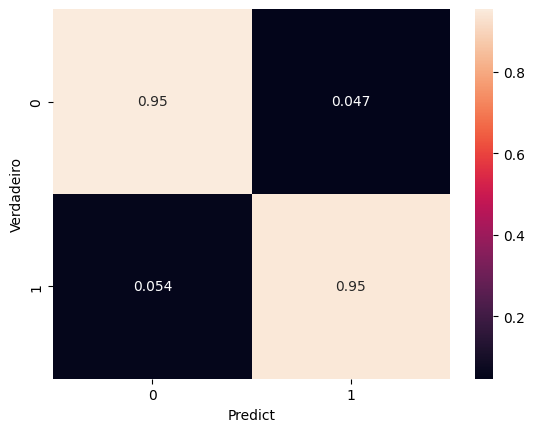

In [ ]:
#Relatório de Classificação Regressão Logística
print(f"Relatório de Classificação:\n {classification_report(y_test, y_predict1, digits=3)}")
print(f"Acurácia: {accuracy_score(y_test, y_predict1):.3f}\n")
print(f"AUC: {roc_auc_score(y_test, y_predict1):.3f}")

#Criando a matriz de confusão
matrix = confusion_matrix(y_test, y_predict1, normalize="true")
sns.heatmap(matrix, annot=True)
plt.xlabel("Predict")
plt.ylabel("Verdadeiro")
plt.show()

## Avaliação Modelo - Regressão Logística

Comparando os resultados obtidos pelo nosso modelo de Regressão Logística entre os dados de validação(balanceados) e os dados de teste(desbalanceados), podemos perceber que o modelo manteve sua acurácia de 95%, enquanto teve um aumento na previsão de fraudes, que era 93% e foi para 95%. Pode parecer uma diferença pequena, mas na prática é uma baita diferença, no geral é um ótimo modelo pois os resultados aplicados aos dados que não foram vistos pelo modelo, são bem próximos aos resultados dos dados no qual ele foi treinado.


## Modelo - Árvore de Decisão

A árvore de decisão é um algoritmo de aprendizado de máquina que modela relações e tomadas de decisão com base em uma estrutura em forma de árvore. A ideia principal é dividir os dados em subconjuntos cada vez mais específicos, com base em características ou atributos, até que se chegue a uma decisão final ou previsão. Essa estrutura em forma de árvore é composta por nós (ou vértices) e ramos (ou arestas). Cada nó representa um teste em um atributo, e cada ramo representa o resultado desse teste. As folhas da árvore representam as classes ou os valores previstos.

<p align="center">
<img src="https://raw.githubusercontent.com/ferreiramar96/Deteccao-Fraude-Cartao-Credito/main/decision_tree.png" width=60%>
</p>

Durante o treinamento da árvore de decisão, o algoritmo busca encontrar as melhores características e pontos de divisão para criar subconjuntos mais puros e distintos possível. Uma das principais vantagens da árvore de decisão é sua interpretabilidade, pois ela permite visualizar e compreender as decisões tomadas em cada nó. Além disso, ela é capaz de lidar com dados categóricos e numéricos e pode ser utilizada para selecionar as características mais importantes.

E as principais métricas para avaliar um modelo de Árvore de Decisão, são os mesmos da Regressão Losgística, eles são padrões para todos os algoritmos de classificação, agora qual será mais importante...isso depende do problema.

## Previsão com os Dados de Validação

In [ ]:
#Instanciando o modelo
np.random.seed(2)
arv_dec = DecisionTreeClassifier(max_depth=3)

#Treinando o modelo
arv_dec.fit(x_bal, y_bal)

#Fazendo as previsões com os dados de validação
y_predict = arv_dec.predict(x_val)
y_probability = arv_dec.predict_proba(x_val)

Acima treinei e fiz as previsões utilizando nosso modelo de Árvore de Decisão. Fiz alguns testes utilizando alguns hiperparâmetro para tentar melhorar o resuldado do modelo e o melhor que encontrei foi o `max_depth`, esse parâmetro consiste em limitar a profundidade máxima da árvore. A profundidade de uma árvore de decisão refere-se ao número de níveis ou camadas de nós, a partir do nó raiz até os nós folha.

E após alguns testes, esse foi o melhor resultado obtido. Vamos ver:

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.935     0.966     60417
           1      0.024     0.924     0.047       105

    accuracy                          0.935     60522
   macro avg      0.512     0.929     0.507     60522
weighted avg      0.998     0.935     0.965     60522

Acurácia: 0.935

AUC: 0.929


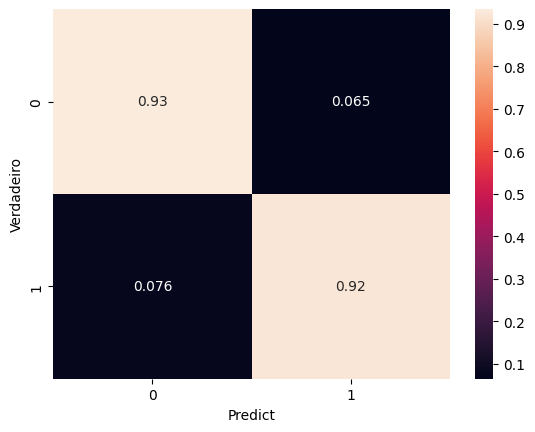

In [ ]:
#Criando o relatório
print(f"Relatório de Classificação:\n {classification_report(y_val, y_predict, digits=3)}")
print(f"Acurácia: {accuracy_score(y_val, y_predict):.3f}\n")
print(f"AUC: {roc_auc_score(y_val, y_predict):.3f}")

matriz = confusion_matrix(y_val, y_predict, normalize='true')
sns.heatmap(matriz, annot=True)
plt.xlabel("Predict")
plt.ylabel("Verdadeiro")
plt.show()

## Previsão com os Dados de Teste

In [ ]:
#Fazer as previsões com os dados de teste
y_predict2 = arv_dec.predict(x_test)
y_probability2 = arv_dec.predict_proba(x_test)[:, 1]

Relatório de Classificação:
               precision    recall  f1-score   support

           0      1.000     0.935     0.966     42647
           1      0.024     0.905     0.046        74

    accuracy                          0.935     42721
   macro avg      0.512     0.920     0.506     42721
weighted avg      0.998     0.935     0.965     42721

Acurácia: 0.935

AUC: 0.920


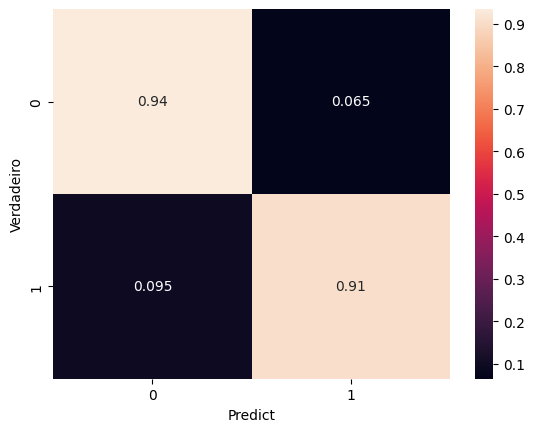

In [ ]:
#Relatório de Classificação Árvore de Decisão
print(f"Relatório de Classificação:\n {classification_report(y_test, y_predict2, digits=3)}")
print(f"Acurácia: {accuracy_score(y_test, y_predict2):.3f}\n")
print(f"AUC: {roc_auc_score(y_test, y_predict2):.3f}")

#Criando a matriz de confusão
matrix = confusion_matrix(y_test, y_predict2, normalize="true")
sns.heatmap(matrix, annot=True)
plt.xlabel("Predict")
plt.ylabel("Verdadeiro")
plt.show()

Como puderam reparar, a parte de treinamento, predict, relatório de classificação e matriz de confusão são iguais em ambos os modelos. Finalizado os 2 modelos, agora irei criar um gráfico de da curva ROC para podermos comparar os 2 e ver qual se saiu melhor para podermos definir qual será utilizado.

<hr>

# Curva ROC

A curva ROC (Receiver Operating Characteristic) é uma ferramenta de avaliação de desempenho de modelos de classificação binária. Ela representa graficamente a taxa de verdadeiros positivos em relação à taxa de falsos positivos, variando o ponto de corte da classificação. A área sob a curva (AUC-ROC) é um indicador do poder discriminativo do modelo, com valores próximos de 1 indicando um bom desempenho.

A curva ROC auxilia na escolha do ponto de corte ideal para equilibrar a sensibilidade e especificidade do modelo. É amplamente utilizada na seleção e comparação de modelos de classificação.

Quanto mais próximo do canto superior esquerdo melhor, e o AUC que já calculamos anteriormente é a área abaixo dessa curva que iremos criar, quanto maior for a área melhor será o nosso modelo. Então sabendo dessas informações, vamos comparar a Regressão Logística e a Árvore de Decisão que foram aplicadas para esse problema de Detecção de Fraude de Cartão de Crédito e ver qual se sai melhor.

AUC - Regressão Logística: 0.95
AUC - Árvore de Decisão: 0.92
---------------------------------


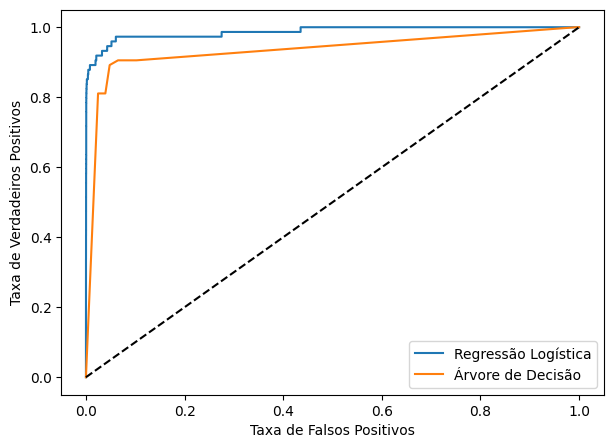

In [ ]:
# Calculando as taxas de verdadeiros positivos e falsos positivos para cada modelo
fpr_modelo1, tpr_modelo1, _ = roc_curve(y_test, y_probability1)
fpr_modelo2, tpr_modelo2, _ = roc_curve(y_test, y_probability2)

#Imprimindo o AUC
print(f"AUC - Regressão Logística: {roc_auc_score(y_test, y_predict1):.2f}")
print(f"AUC - Árvore de Decisão: {roc_auc_score(y_test, y_predict2):.2f}")
print("---------------------------------")

# Plotando a curva ROC para cada modelo
plt.figure(figsize=(7, 5))
plt.plot(fpr_modelo1, tpr_modelo1, label='Regressão Logística')
plt.plot(fpr_modelo2, tpr_modelo2, label='Árvore de Decisão')
plt.plot([0, 1], [0, 1], 'k--')

# Incluindo uma legenda e rótulos nos eixos
plt.legend(loc='lower right')
plt.xlabel('Taxa de Falsos Positivos')
plt.ylabel('Taxa de Verdadeiros Positivos')
plt.show()

## Comparando os Modelos

Observando e comparando nossos 2 modelos, ao observar o gráfico da `Curva ROC` podemos ver que o modelo de Regressão Logística é melhor já que ele foi o mais próximo de 1, porém não basta avaliar somente uma métrica. Neste problema de negócio em questão existe uma outra métrica muito importante, que é o `Recall`.

O recall é uma métrica muito importante porque ele mede a capacidade do modelo em identificar corretamente as transações fraudulentas. Em um cenário de detecção de fraudes, é fundamental minimizar os casos em que uma transação fraudulenta é classificada como legítima (falso negativo), pois isso representa uma perda financeira para as instituições e os clientes.

Então podemos dizer que nosso modelo de `Regressão Logística` é o melhor modelo para o problema em questão, apresentando um Recall de 95%, em contra partida o Recall da `Árvore de Decisão` de 91% inferior ao do outro modelo. **O algoritmo de Regressão Logística venceu na curva ROC e no recall, e é por isso que ele acaba sendo o melhor.**

## Conclusão

Ao final de nosso projeto, podemos tirar algumas conclusões sobre como tudo foi feito e pensado. E alguns desses pontos são:

* Antes de qualquer coisa foi preciso entender qual era o problema que iríamos resolver, compreender as variáveis e as transformações que foram feitas para que nenhum dado dos clientes seja vazado ou descoberto.

* Em relação aos dados, comecei separando uma porção de 15% dos dados originais para poder aplicar ao modelo de machine learning ao final do projeto e ver o quão bom nosso modelo chega a ser, aplicando dados nunca visto por ele antes.

* Depois realizamos uma análise exploratória dos dados, vendo algumas descrições estatísticas, como: média, mediana, desvio padrão e quartis. Plotamos também alguns histogramas e boxplots, para observar a distribuição dos dados e identificarmos valores outliers.

* Em seguida começamos a fazer a preparação dos dados para aplicarmos os modelos de Machine Learning, e fizemos algumas trasformações como: padronização de algumas variáveis, separação dos dados para aplicar ao modelo e rebalancear as classes.

* E já partimos para a construção de nossos modelos, utilizei 2 algoritmos: Regressão Logística e Árvore de Decisão. Para os dois fiz as seguintes etapas: Treinei o modelo, apliquei dados de validação e depois apliquei os dados de teste, que como mencionado anteriormente nunca foram vistos pelo modelo. Então a partir dai construí um Relatório de Classificação e a Matriz de Confusão para cada modelo. Esse relatório consiste em algumas métricas para avaliar o desempenho do algoritmo e a matriz é para visualizarmos a porcentagem de `True Positive`, `True Negative`, `False Positive` e `False Negative`. E fiz também um gráfico representando a curva ROC, no qual é possível ver qual algoritmo se saiu melhor.

* E para finalizar, realizei a comparação entre os 2 algoritmos. E após as análises e explicações, **o melhor modelo para o nosso projeto em questão foi o de Regressão Logística.**